# Ada Boost

In [59]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [60]:
df = pd.DataFrame()

In [61]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [62]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

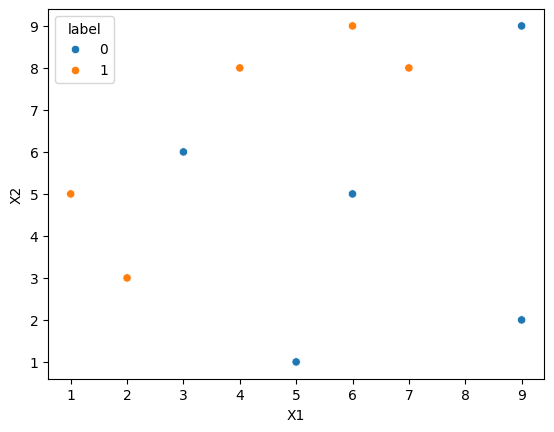

In [63]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [64]:
df['weights'] = 1/df.shape[0]

In [65]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [68]:
x = df.iloc[:,:-2].values
y = df.iloc[:,-2].values
dt1.fit(x, y)

DecisionTreeClassifier(max_depth=1)

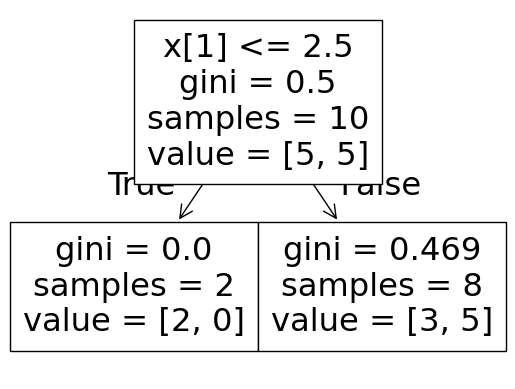

In [69]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(dt1)
plt.show()

<Axes: >

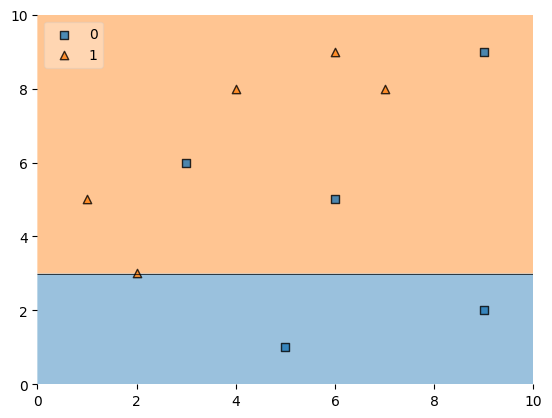

In [70]:
plot_decision_regions(x, y, clf=dt1, legend=2)

In [71]:
df['y_pred'] = dt1.predict(x)

In [72]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


> Calculating error

In [ ]:
error = df.loc[df['label'] != df['y_pred'], 'weights'].sum()

In [112]:
def cal_model_weight(error):
    return 0.5*np.log((1-error)/(error+0.000000000000000000001))

> alpha 1

In [75]:
alpha1 = cal_model_weight(error)

> Update Weights

In [79]:
def update_row_weights(row, alpha=alpha1):
    if row['label'] == row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)         
    

In [78]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [81]:
df['updated_wt'] = df.apply(update_row_weights, axis=1)

> Normalized Weights

In [83]:
df['normalized_wts'] = df['updated_wt']/df['updated_wt'].sum()

In [86]:
np.round(df['normalized_wts'].sum())

np.float64(1.0)

> Define Ranges

In [87]:
df['cumsum_upper'] = np.cumsum(df['normalized_wts'])

In [89]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_wts']

> Creating new dataset

In [91]:
def create_new_dataset(df):
    indexes = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indexes.append(index)
    return indexes
    

In [95]:
df

,X1,X2,label,weights,y_pred,updated_wt,normalized_wts,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065465,0.071429,0.071429,0.000000
1,2,3,1,0.1,1,0.065465,0.071429,0.142857,0.071429
2,3,6,0,0.1,1,0.152753,0.166667,0.309524,0.142857
3,4,8,1,0.1,1,0.065465,0.071429,0.380952,0.309524
4,5,1,0,0.1,0,0.065465,0.071429,0.452381,0.380952
5,6,9,1,0.1,1,0.065465,0.071429,0.523810,0.452381
6,6,5,0,0.1,1,0.152753,0.166667,0.690476,0.523810
7,7,8,1,0.1,1,0.065465,0.071429,0.761905,0.690476
8,9,9,0,0.1,1,0.152753,0.166667,0.928571,0.761905
9,9,2,0,0.1,0,0.065465,0.071429,1.000000,0.928571


In [94]:
index_values = create_new_dataset(df)
index_values

[0, 1, 7, 8, 0, 2, 8, 5, 8, 0]

In [96]:
second_df = df.iloc[index_values, :4]

In [98]:
# weights should be same in every new dataset
second_df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
7,7,8,1,0.1
8,9,9,0,0.1
0,1,5,1,0.1
2,3,6,0,0.1
8,9,9,0,0.1
5,6,9,1,0.1
8,9,9,0,0.1
0,1,5,1,0.1


In [99]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [100]:
x = second_df.iloc[:,:-2].values
y = second_df.iloc[:,-2].values

In [101]:
dt2.fit(x, y)

DecisionTreeClassifier(max_depth=1)

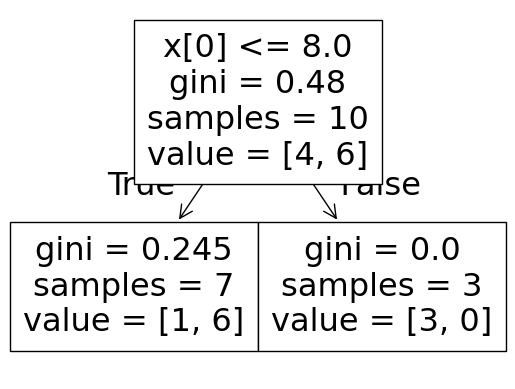

In [103]:
plot_tree(dt2)
plt.show()

<Axes: >

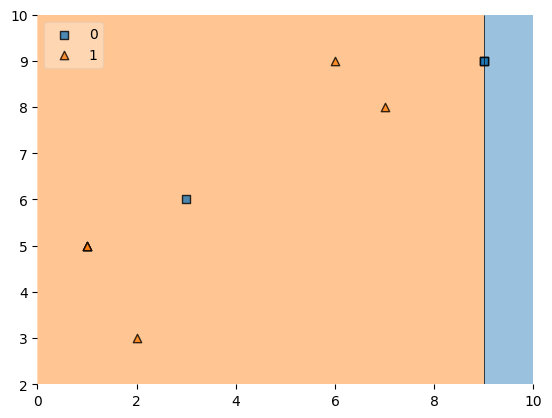

In [104]:
plot_decision_regions(x, y, clf=dt2, legend=2)

In [106]:
second_df['y_pred'] = dt2.predict(x)

In [109]:
error = second_df.loc[second_df['label'] != second_df['y_pred'], 'weights'].sum()

In [114]:
alpha2 = cal_model_weight(error)

In [115]:
alpha2

np.float64(1.0986122886681098)

In [117]:
second_df['updated_wts'] = second_df.apply(update_row_weights, alpha=alpha2, axis=1)

In [118]:
second_df

,X1,X2,label,weights,y_pred,updated_wts
0,1,5,1,0.1,1,0.033333
1,2,3,1,0.1,1,0.033333
7,7,8,1,0.1,1,0.033333
8,9,9,0,0.1,0,0.033333
0,1,5,1,0.1,1,0.033333
2,3,6,0,0.1,1,0.300000
8,9,9,0,0.1,0,0.033333
5,6,9,1,0.1,1,0.033333
8,9,9,0,0.1,0,0.033333
0,1,5,1,0.1,1,0.033333


In [119]:
second_df['normalized_wts'] = second_df['updated_wts']/second_df['updated_wts'].sum()

In [122]:
second_df['normalized_wts'].sum()

np.float64(1.0000000000000002)

In [123]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_wts'])

In [124]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_wts'] 

In [125]:
second_df

,X1,X2,label,weights,y_pred,updated_wts,normalized_wts,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.033333,0.055556,0.055556,0.000000
1,2,3,1,0.1,1,0.033333,0.055556,0.111111,0.055556
7,7,8,1,0.1,1,0.033333,0.055556,0.166667,0.111111
8,9,9,0,0.1,0,0.033333,0.055556,0.222222,0.166667
0,1,5,1,0.1,1,0.033333,0.055556,0.277778,0.222222
2,3,6,0,0.1,1,0.300000,0.500000,0.777778,0.277778
8,9,9,0,0.1,0,0.033333,0.055556,0.833333,0.777778
5,6,9,1,0.1,1,0.033333,0.055556,0.888889,0.833333
8,9,9,0,0.1,0,0.033333,0.055556,0.944444,0.888889
0,1,5,1,0.1,1,0.033333,0.055556,1.000000,0.944444


In [150]:
index_values = create_new_dataset(second_df)

In [182]:
third_df = second_df.iloc[index_values, [0, 1, 2, 3]]

In [183]:
third_df

,X1,X2,label,weights
7,7,8,1,0.1
8,9,9,0,0.1
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
2,3,6,0,0.1
7,7,8,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1


In [184]:
dt3 = DecisionTreeClassifier(max_depth=1)
x = third_df.iloc[:,:-2].values
y = third_df.iloc[:,-2].values

In [185]:
y

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

In [186]:
dt3.fit(x, y)

DecisionTreeClassifier(max_depth=1)

In [187]:
third_df['y_pred'] = dt3.predict(x)

In [190]:
third_df

,X1,X2,label,weights,y_pred
7,7,8,1,0.1,1
8,9,9,0,0.1,0
7,7,8,1,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,1
2,3,6,0,0.1,1
7,7,8,1,0.1,1
0,1,5,1,0.1,1
0,1,5,1,0.1,1
0,1,5,1,0.1,1


<Axes: >

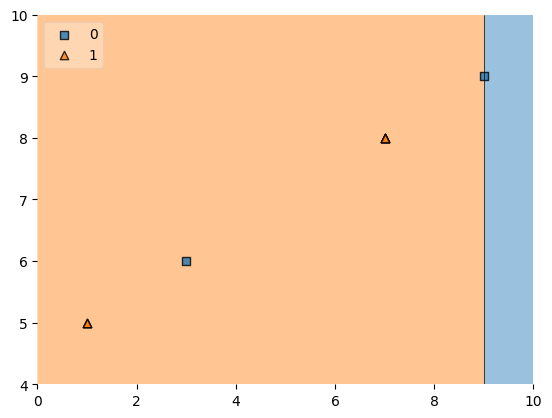

In [188]:
plot_decision_regions(x, y, clf=dt3, legend=2)

In [192]:
alpha3 = cal_model_weight(0.1)

In [193]:
print(alpha1, alpha2, alpha3)

0.4236489301936017 1.0986122886681098 1.0986122886681098


> Prediction

In [199]:
query = np.array([9,9]).reshape(1, 2)
print(dt1.predict(query))
print(dt2.predict(query))
print(dt3.predict(query))

[1]
[0]
[0]


In [202]:
# taking 1 if prediction is 1, and take -1 if pred is 0
np.sign(alpha1*(1) + alpha2*(1) + alpha3*(1))

np.float64(1.0)

In [203]:
np.sign(alpha1*(1) + alpha2*(-1) + alpha3*(-1))

np.float64(-1.0)